## QGAN

In this notebook, we are going to use Aqua's implementation of a Quantum Generative Adversarial Network to prepare a quantum state which is close to a given probability distribution 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from qiskit import Aer
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import QGAN

We first generate training data taken from a simple probability distribution

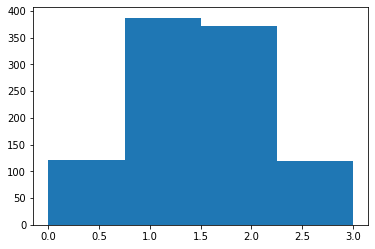

In [2]:
np.random.seed(2020)
N = 1000

real_data = np.random.binomial(3,0.5,N)
plt.hist(real_data, bins = 4);

Now, we define the parameters for our QAN and train it with the real data. Then, we use the trained generator to generate some samples and we represent them in a histogram.  

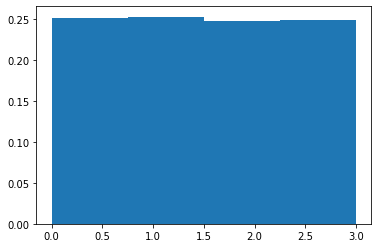

In [3]:
n = 2
num_qubits = [n]
num_epochs = 100
batch_size = 100
bounds = [0,3]
qgan = QGAN(data = real_data, 
            num_qubits = num_qubits, 
            batch_size = batch_size, 
            num_epochs = num_epochs,
            bounds = bounds,
            seed = 2020)
quantum_instance = QuantumInstance(backend=Aer.get_backend('statevector_simulator'))
result = qgan.run(quantum_instance)
samples_g, prob_g = qgan.generator.get_output(qgan.quantum_instance, shots=10000)
plt.hist(range(4), weights = prob_g, bins = 4);

We show the evolution of the loss function of both the generator and the discriminator

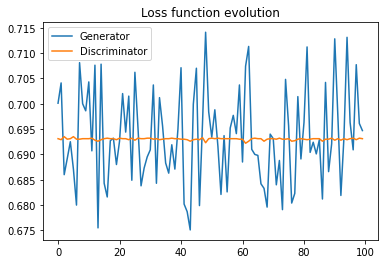

In [4]:
plt.title("Loss function evolution")
plt.plot(range(num_epochs), qgan.g_loss, label='Generator')
plt.plot(range(num_epochs), qgan.d_loss, label='Discriminator')
plt.legend()
plt.show()

And, also, the evolution of the relative entropy during the training.

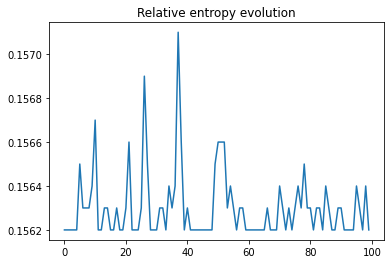

In [5]:
plt.title('Relative entropy evolution')
plt.plot(qgan.rel_entr)
plt.show()

In [6]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.16.1',
 'qiskit-aer': '0.7.1',
 'qiskit-ignis': '0.5.1',
 'qiskit-ibmq-provider': '0.11.1',
 'qiskit-aqua': '0.8.1',
 'qiskit': '0.23.1'}